<a href="https://colab.research.google.com/github/AdityaSoni13-coding/Diabetes-Prediction/blob/main/DiabetesProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/DiabetesProjectML')

Mounted at /content/drive


###importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, classification_report

###Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DiabetesProjectML/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
target = 'Diabetes_binary'

# Create a feature matrix 'X' by dropping the target variable
X = df.drop(target, axis=1)

# Create a target vector 'y'
y = df[target]

###Data Description

In [ ]:
print(df.shape)

(70692, 22)


In [ ]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [ ]:
X.shape , y.shape

((70692, 21), (70692,))

###EDA(Exploratiory Data Analysis)

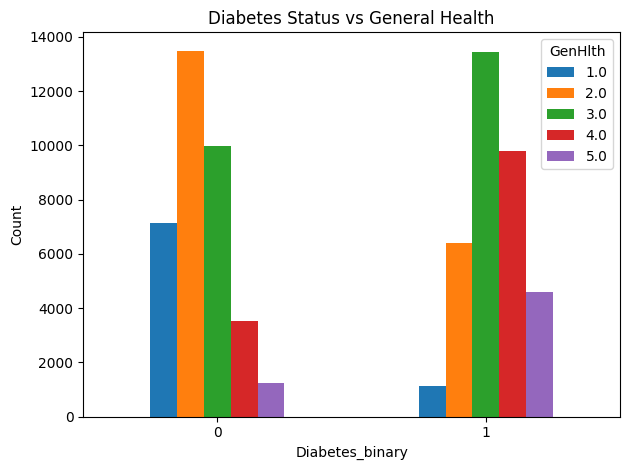

In [ ]:
# Create a crosstab to get the count of each combination of Diabetes_Status and General_Health
ct = pd.crosstab(df['Diabetes_binary'], df['GenHlth'])

# Plotting the bar plot
ct.plot(kind='bar')

plt.title('Diabetes Status vs General Health')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0','1'], rotation=0)
plt.legend(title='GenHlth', labels=['1.0','2.0','3.0','4.0','5.0'])

plt.tight_layout()
plt.show()



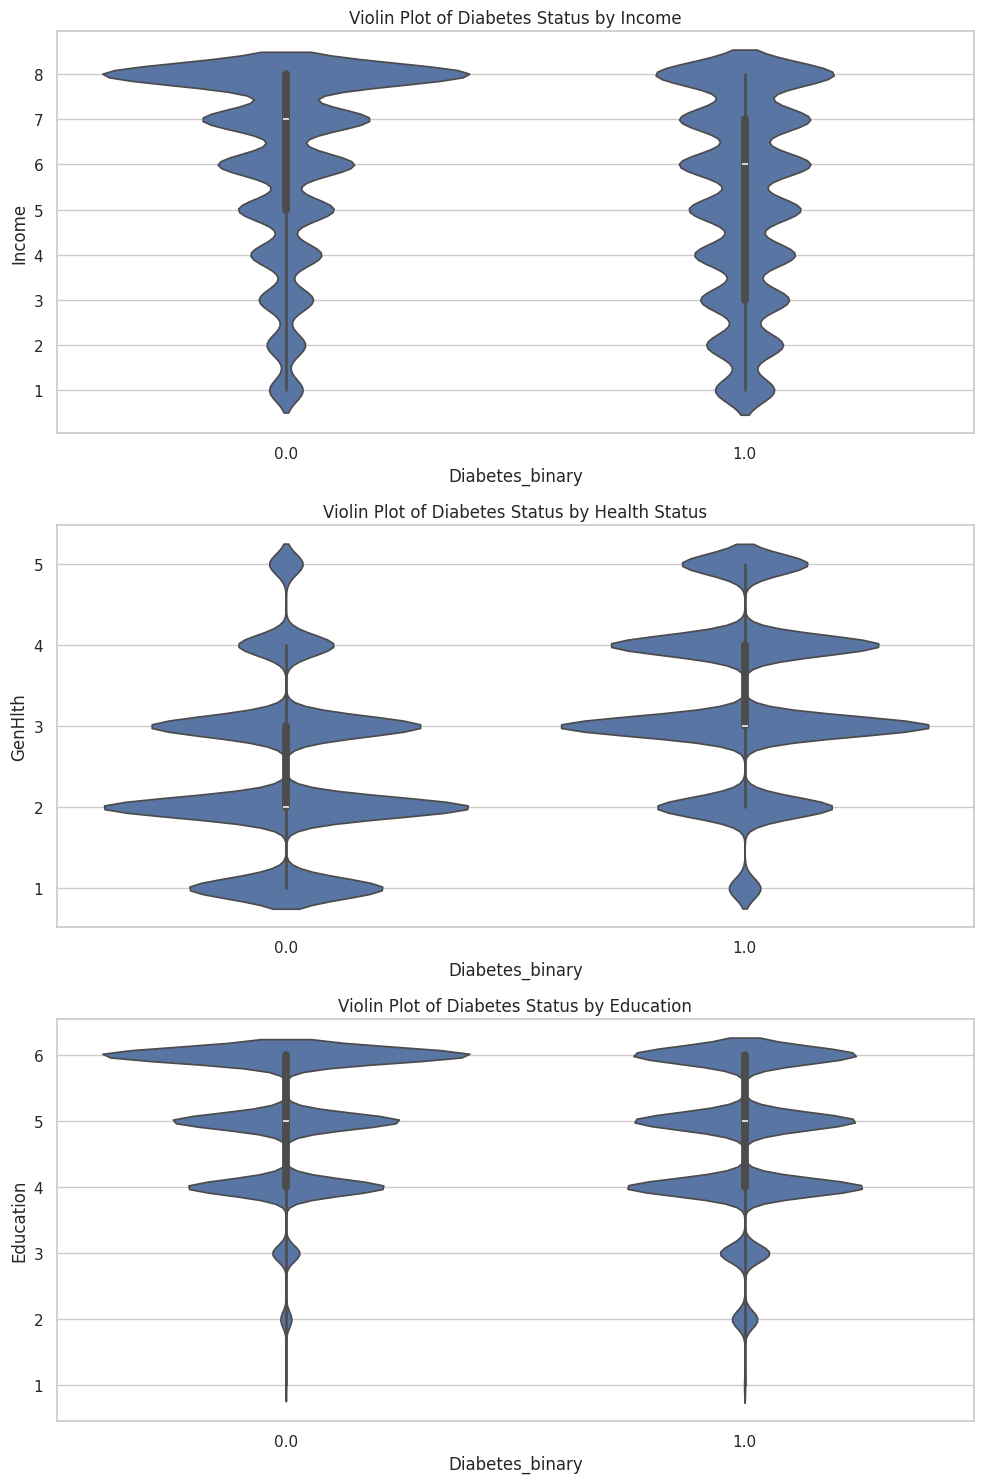

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(3,1, figsize=(10,15))

# Violin plot for Diabetes Status vs Income
sns.violinplot(ax=axes[0], x='Diabetes_binary', y='Income', data=df)
axes[0].set_title('Violin Plot of Diabetes Status by Income')

# Violin plot for Diabetes Status vs Health Status
sns.violinplot(ax=axes[1], x='Diabetes_binary', y='GenHlth', data=df)
axes[1].set_title('Violin Plot of Diabetes Status by Health Status')

# Violin plot for Diabetes Status vs Education Level
sns.violinplot(ax=axes[2], x='Diabetes_binary', y='Education', data=df)
axes[2].set_title('Violin Plot of Diabetes Status by Education')

# Display the plots
plt.tight_layout()
plt.show()


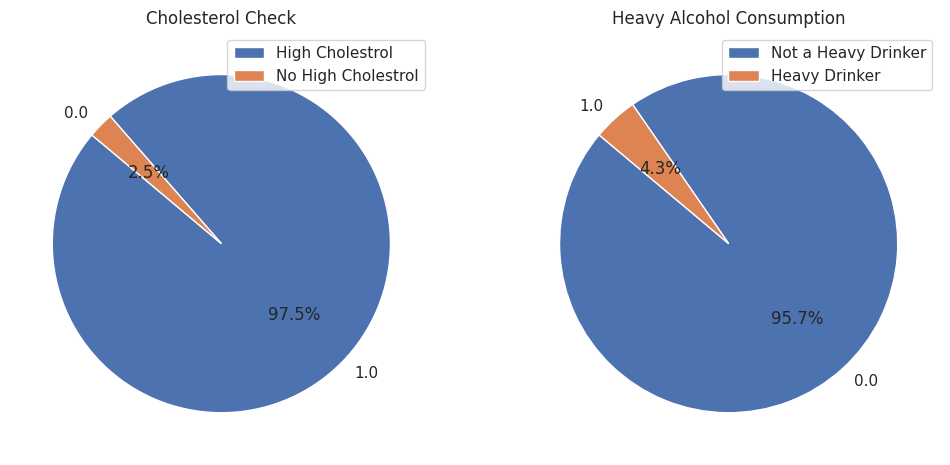

In [ ]:
# Calculate the percentages for cholesterol
cholesterol_counts = df['CholCheck'].value_counts(normalize=True) * 100

# Calculate the percentages for alcohol consumption
alcohol_counts = df['HvyAlcoholConsump'].value_counts(normalize=True) * 100

# Plotting pie chart for cholesterol levels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cholesterol Check')
plt.legend(labels=['High Cholestrol','No High Cholestrol'])
# Plotting pie chart for heavy alcohol consumption
plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Heavy Alcohol Consumption')
plt.legend(labels=['Not a Heavy Drinker','Heavy Drinker'])
# Display the pie charts
plt.show()


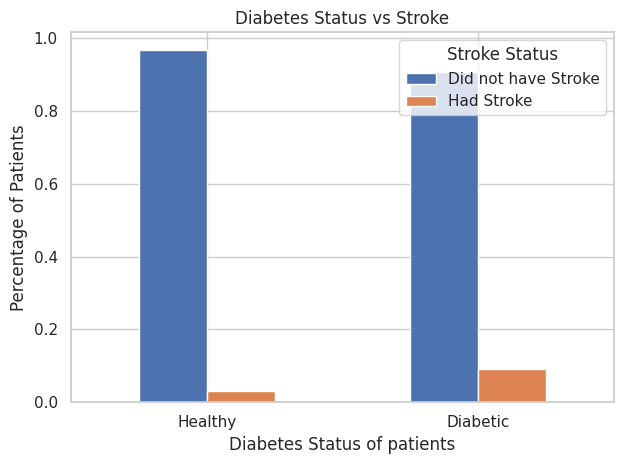

In [ ]:
# Create a crosstab to get the count of each combination of Diabetes_Status and Stroke
ct = pd.crosstab(df['Diabetes_binary'], df['Stroke'])

# Normalize the cross-tabulation to get the percentage
ct = ct.div(ct.sum(axis=1), axis=0)

# Plotting the bar plot
ct.plot(kind='bar')

plt.title('Diabetes Status vs Stroke')
plt.xlabel('Diabetes Status of patients')
plt.ylabel('Percentage of Patients')
plt.xticks(ticks=[0,1],labels=['Healthy','Diabetic'],rotation=0)
plt.legend(title='Stroke Status', labels=['Did not have Stroke','Had Stroke'])

plt.tight_layout()
plt.show()


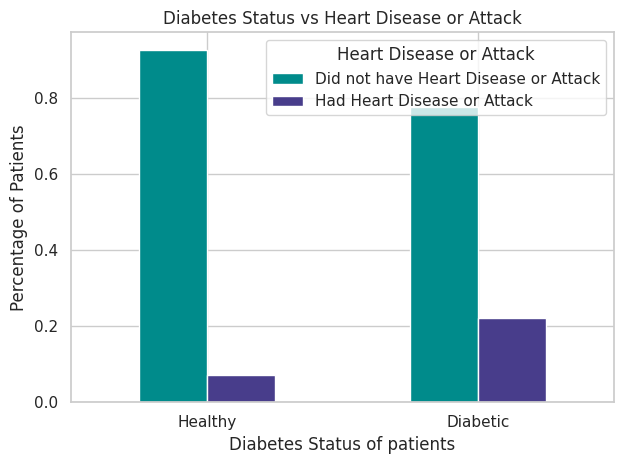

In [ ]:
# Create a crosstab to get the count of each combination of Diabetes_Status and HeartDiseaseorAttack
ct = pd.crosstab(df['Diabetes_binary'], df['HeartDiseaseorAttack'])

# Normalize the cross-tabulation to get the percentage
ct = ct.div(ct.sum(axis=1), axis=0)
colors = ['darkcyan','darkslateblue']
# Plotting the bar plot
ct.plot(kind='bar',color=colors)

plt.title('Diabetes Status vs Heart Disease or Attack')
plt.xlabel('Diabetes Status of patients')
plt.ylabel('Percentage of Patients')
plt.xticks(ticks=[0,1],labels=['Healthy','Diabetic'],rotation=0)
plt.legend(title='Heart Disease or Attack', labels=['Did not have Heart Disease or Attack','Had Heart Disease or Attack'])

plt.tight_layout()
plt.show()

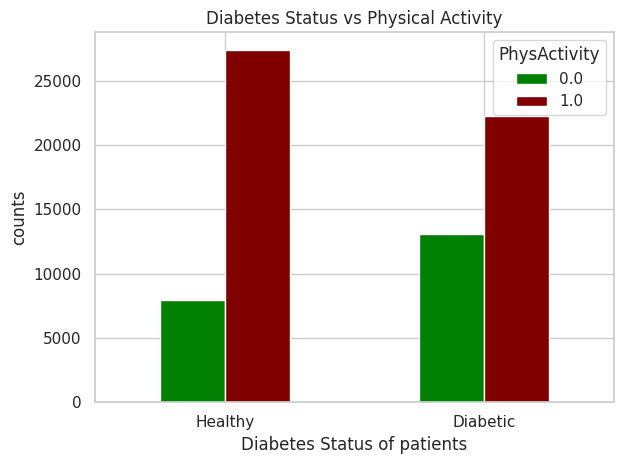

In [ ]:
# Create a crosstab to get the count of each combination of Diabetes_Status and PhysActivity
ct = pd.crosstab(df['Diabetes_binary'], df['PhysActivity'])

colors = ['green','maroon']
# Plotting the bar plot
ct.plot(kind='bar',color=colors)

plt.title('Diabetes Status vs Physical Activity')
plt.xlabel('Diabetes Status of patients')
plt.ylabel('counts')
plt.xticks(ticks=[0,1],labels=['Healthy','Diabetic'],rotation=0)
plt.legend(title='PhysActivity', labels=['0.0','1.0'])

plt.tight_layout()
plt.show()

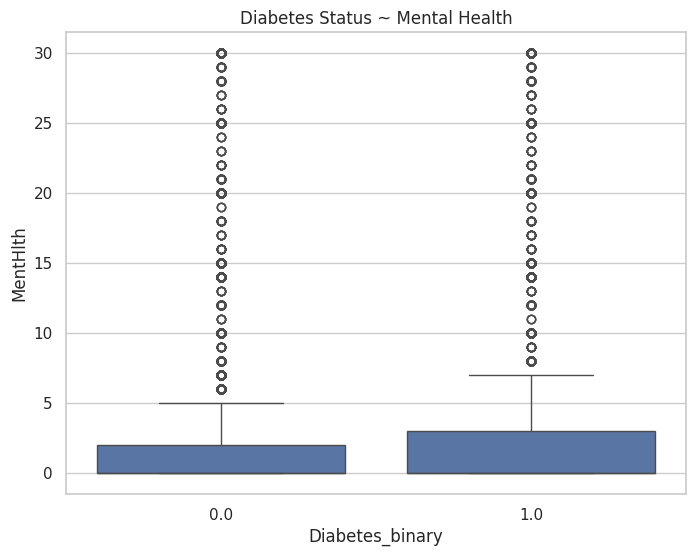

In [ ]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=df)
plt.title('Diabetes Status ~ Mental Health')
plt.xlabel('Diabetes_binary')
plt.ylabel('MentHlth')
plt.show()

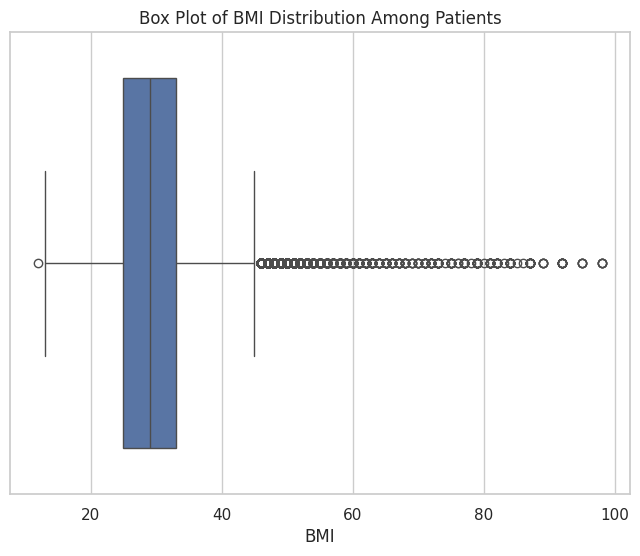

In [ ]:
# Plotting the box plot for BMI distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI', data=df)
plt.title('Box Plot of BMI Distribution Among Patients')
plt.xlabel('BMI')
plt.show()


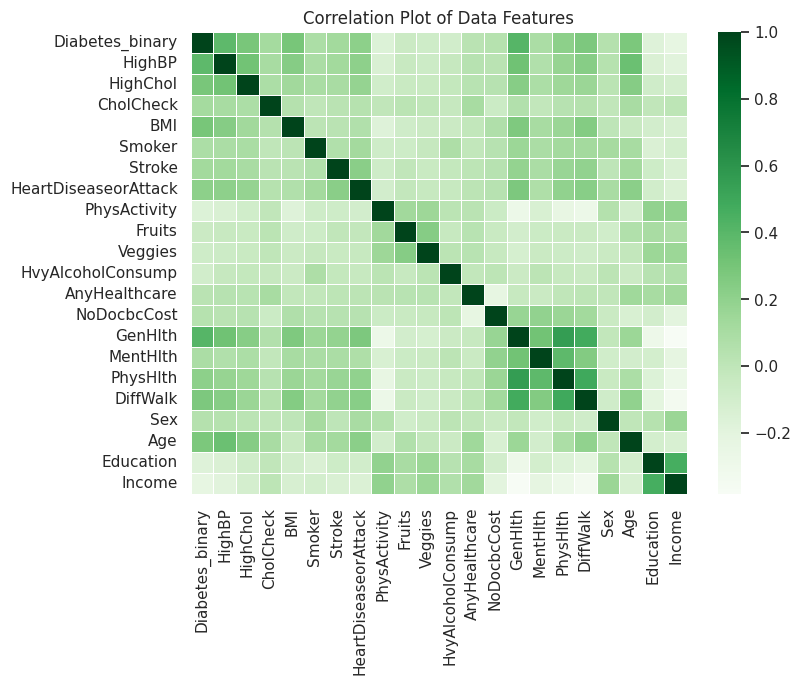

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, fmt='.2f', cmap='Greens', cbar=True, linewidths=0.5, linecolor='white')
plt.title('Correlation Plot of Data Features')
plt.show()


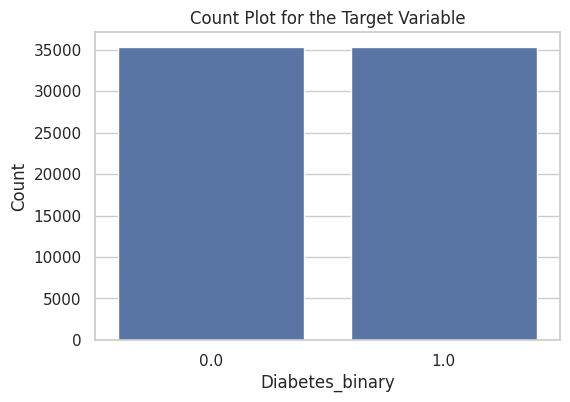

In [ ]:
# Plotting the count plot for the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Count Plot for the Target Variable')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

###Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the training set
scaler.fit(X_train)

# Step 4: Apply the scaler to the training set
X_train_scaled = scaler.transform(X_train)

# Step 5: Apply the same scaler to the test set
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
# By default, PCA() centers the data, but doesn't scale it.
pca = PCA()

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)


PCA()

In [ ]:
# Get the feature names
features = X.columns

# Get the loadings
loadings = pca.components_

# For each principal component
for i, component in enumerate(loadings):
    # Get the index of the features that contribute most to this component
    top_feature_indices = np.abs(component).argsort()[::-1]

    # Print the top 1 features
    print(f"Principal component {i+1}:")
    for j in top_feature_indices[:1]:
        print(f" - {features[j]}: {component[j]}")

    if i >= 12:
        break


Principal component 1:
 - HighBP: 0.44341210355985405
Principal component 2:
 - Sex: -0.756872002093521
Principal component 3:
 - Fruits: -0.5429375374951014
Principal component 4:
 - Smoker: 0.7559400339731189
Principal component 5:
 - Sex: 0.5597911208339471
Principal component 6:
 - HighBP: -0.7041487871743755
Principal component 7:
 - PhysActivity: 0.783809571935321
Principal component 8:
 - Veggies: -0.8777106108813998
Principal component 9:
 - HeartDiseaseorAttack: 0.8270421207628235
Principal component 10:
 - DiffWalk: -0.564595030452128
Principal component 11:
 - Income: 0.5356657517171358
Principal component 12:
 - NoDocbcCost: 0.6241031447313109
Principal component 13:
 - MentHlth: 0.7158353689398447


In [ ]:
import numpy as np

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 90% variance
num_components = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

# Print the number of components
print(f"Number of components for 90% variance: {num_components}")

pca_13 = PCA(n_components=13)
print(pca_13)
# Fit and transform the data
X_train_pca_13 = pca_13.fit_transform(X_train_scaled)
X_test_pca_13 = pca_13.transform(X_test_scaled)


Number of components for 90% variance: 13
PCA(n_components=13)


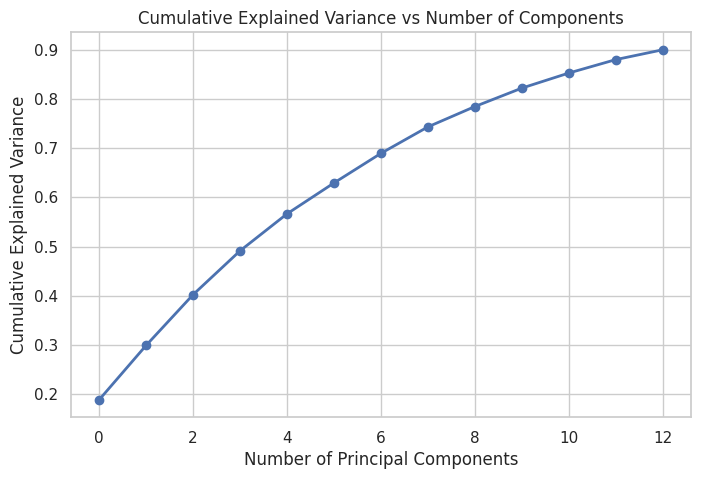

In [ ]:
import matplotlib.pyplot as plt

# Calculate the explained variance for each of the first 8 components
explained_variance_13 = pca_13.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_13)

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, 'o-', linewidth=2)
plt.title('Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

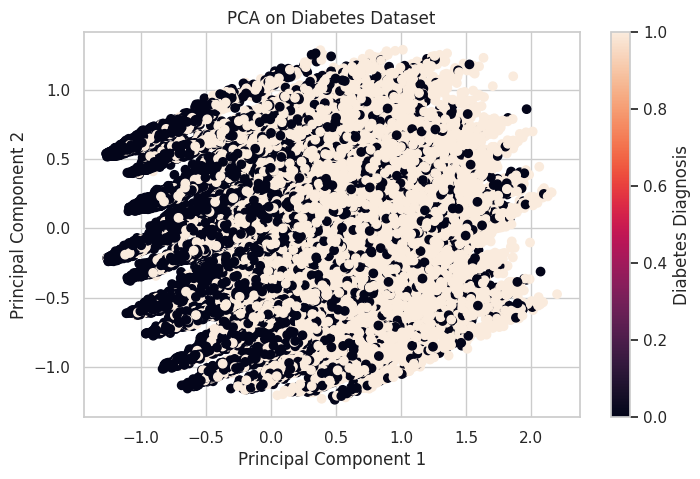

In [ ]:
import matplotlib.pyplot as plt

# Apply the PCA transformation to the scaled data
X_train_pca_13 = pca_13.transform(X_train_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(X_train_pca_13[:, 0], X_train_pca_13[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Diabetes Dataset')
plt.colorbar(label='Diabetes Diagnosis')

plt.show()


###Applying various Machine Learning Models

Logistic Regression,
Random Forest,
K-Nearest Neighbours,
Naive Bayes,
Decision Tree

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Sensitivity (Recall): {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1-Score: {f1}")
    print(f"Hamming Loss: {h_loss}")



In [ ]:
# Logistic Regression
print("Logistic Regression:")
lr = LogisticRegression()
train_and_evaluate_model(lr, X_train_pca_13, y_train, X_test_pca_13, y_test)

# Decision Tree
print("\nDecision Tree:")
dt = DecisionTreeClassifier()
train_and_evaluate_model(dt, X_train_pca_13, y_train, X_test_pca_13, y_test)

# Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier()
train_and_evaluate_model(rf, X_train_pca_13, y_train, X_test_pca_13, y_test)

# K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
knn = KNeighborsClassifier()
train_and_evaluate_model(knn, X_train_pca_13, y_train, X_test_pca_13, y_test)

# Naive Bayes
print("\nNaive Bayes:")
nb = GaussianNB()
train_and_evaluate_model(nb, X_train_pca_13, y_train, X_test_pca_13, y_test)


Logistic Regression:
Accuracy: 0.7209845109272226
Precision: 0.7131868131868132
Sensitivity (Recall): 0.7365583770747623
Specificity: 0.7055007052186177
F1-Score: 0.7246842068532349
Hamming Loss: 0.2790154890727774

Decision Tree:
Accuracy: 0.6450244005941014
Precision: 0.6423562412342216
Sensitivity (Recall): 0.6497375514257342
Specificity: 0.6403385049365303
F1-Score: 0.6460258128217787
Hamming Loss: 0.35497559940589857

Random Forest:
Accuracy: 0.7047174481929415
Precision: 0.6877449699503527
Sensitivity (Recall): 0.746772591857001
Specificity: 0.6629055007052186
F1-Score: 0.7160443446915595
Hamming Loss: 0.2952825518070585

K-Nearest Neighbors:
Accuracy: 0.6980691703798005
Precision: 0.6831839746968899
Sensitivity (Recall): 0.7354234643211803
Specificity: 0.6609308885754583
F1-Score: 0.7083418733346998
Hamming Loss: 0.30193082962019946

Naive Bayes:
Accuracy: 0.6841360775160903
Precision: 0.6920446096654275
Sensitivity (Recall): 0.6602354943963683
Specificity: 0.7078984485190409
F1

###Visualisation

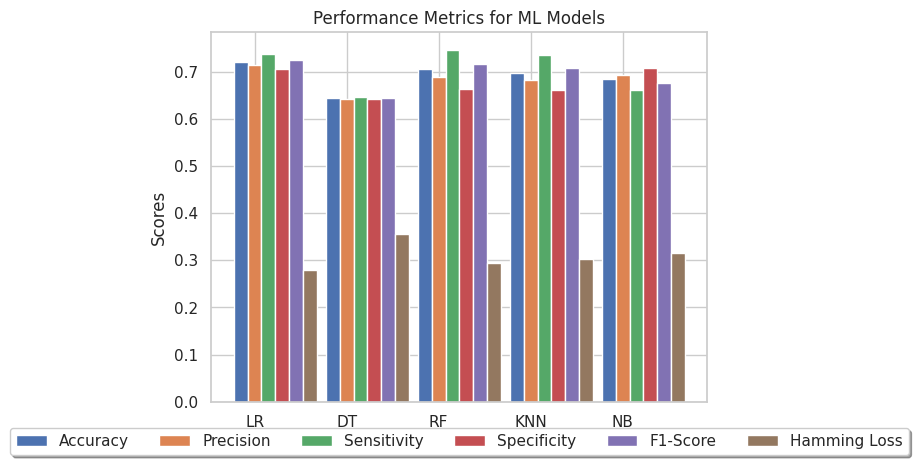

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = ['LR', 'DT', 'RF', 'KNN', 'NB']

accuracy = [0.7209845109272226,0.6436098733998161,0.7049296272720843,0.697927717660372,0.6841360775160903]
precision = [0.7131868131868132,0.6415891800507185,0.6880637991894365,0.6831004481940417,0.6920446096654275]
sensitivity = [0.7365583770747623,0.6460490849765924,0.7466307277628033,0.7351397361327848, 0.6602354943963683]
specificity = [0.7055007052186177,0.6411847672778561,0.6634696755994358,0.6609308885754583,0.7078984485190409]
f1_score = [0.7246842068532349,0.6438114087792465, 0.7161518573955641,0.7081653570208404,0.6757659358211122]
hamming_loss = [0.2790154890727774,0.3563901266001839,0.2950703727279157,0.30207228233962796,0.31586392248390976]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the bar width
bar_width = 0.15

# Define the bar positions
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create the bars
ax.bar(r1, accuracy, width=bar_width, label='Accuracy')
ax.bar(r2, precision, width=bar_width, label='Precision')
ax.bar(r3, sensitivity, width=bar_width, label='Sensitivity')
ax.bar(r4, specificity, width=bar_width, label='Specificity')
ax.bar(r5, f1_score, width=bar_width, label='F1-Score')
ax.bar(r6, hamming_loss, width=bar_width, label='Hamming Loss')

# Add xticks on the middle of the group bars
ax.set_xlabel('Models')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)

# Create legend & Show graphic
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for ML Models')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)


# Show the plot
plt.show()


In [ ]:
# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

plt.figure(figsize=(8, 6))

# Iterate over the classifiers
for name, clf in classifiers.items():
    # Train the classifier and make predictions
    clf.fit(X_train_pca_13, y_train)
    y_score = clf.predict_proba(X_test_pca_13)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve for {name} (area = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))

# Iterate over the classifiers
for name, clf in classifiers.items():
    # Train the classifier and make predictions
    clf.fit(X_train_pca_13, y_train)
    y_score = clf.predict_proba(X_test_pca_13)[:, 1]

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'Precision-Recall curve for {name} (area = {average_precision:.2f})')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()


###PYCARET

In [ ]:
#!pip install pycaret

In [ ]:
# check installed version
import pycaret
pycaret.__version__

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'Diabetes_binary', session_id = 123)

In [ ]:
# compare baseline models
best = compare_models()

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

In [ ]:
models()

In [ ]:
get_metrics()

###GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
#XGBOOST_HP
xgbst = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, objective='binary:logistic')

In [ ]:
Param_Grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.001],
    'max_depth': [2, 3]
}

Grid_Search = GridSearchCV(estimator=xgbst, param_grid=Param_Grid, cv=5, scoring='accuracy')

Grid_Search.fit(X_train_pca_13, y_train)

print("Best Hyperparameters:", Grid_Search.best_params_)

In [ ]:
%%time
xgbst = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.2, objective='binary:logistic')

xgbst.fit(X_train_pca_13, y_train)

y_Pred = xgbst.predict(X_test_pca_13)

In [ ]:
Accuracy = accuracy_score(y_test, y_Pred)
Confusion_Matrix = confusion_matrix(y_test, y_Pred)
Classification_Report = classification_report(y_test, y_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)